# Radioastronomia 1 2017/18
## Sprawozdanie - ćw. 1b
## Pomiar i obliczenie temperatury antenowej i temperatury radiometru
### Dawid Kubicki

## Wstęp

Ćwiczenie przeprowadzono 11 października 2017 w Obserwatorium Astronomicznym UJ przy radioteleskopie RT-15. Celem ćwiczenia było wyznaczenie temperatury antenowej i temperatury radiometru dla teleskopu.

W tym celu dokonano pomiary sygnału w zenicie, a następnie przejechano radioteleskopem na horyzont. Kalibracji dokonano zarówno w okolicy zenitu oraz w horyzoncie. Należy odnotować, że kalibrację w okolicy zenitu prowdzono podczas ruchu radioteleskopu. Parametry obserwacji były takie same jak dla ćwiczenia 1a. 

/home/dawid/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/dawid/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Liczba punktow pomiarowych: 2761


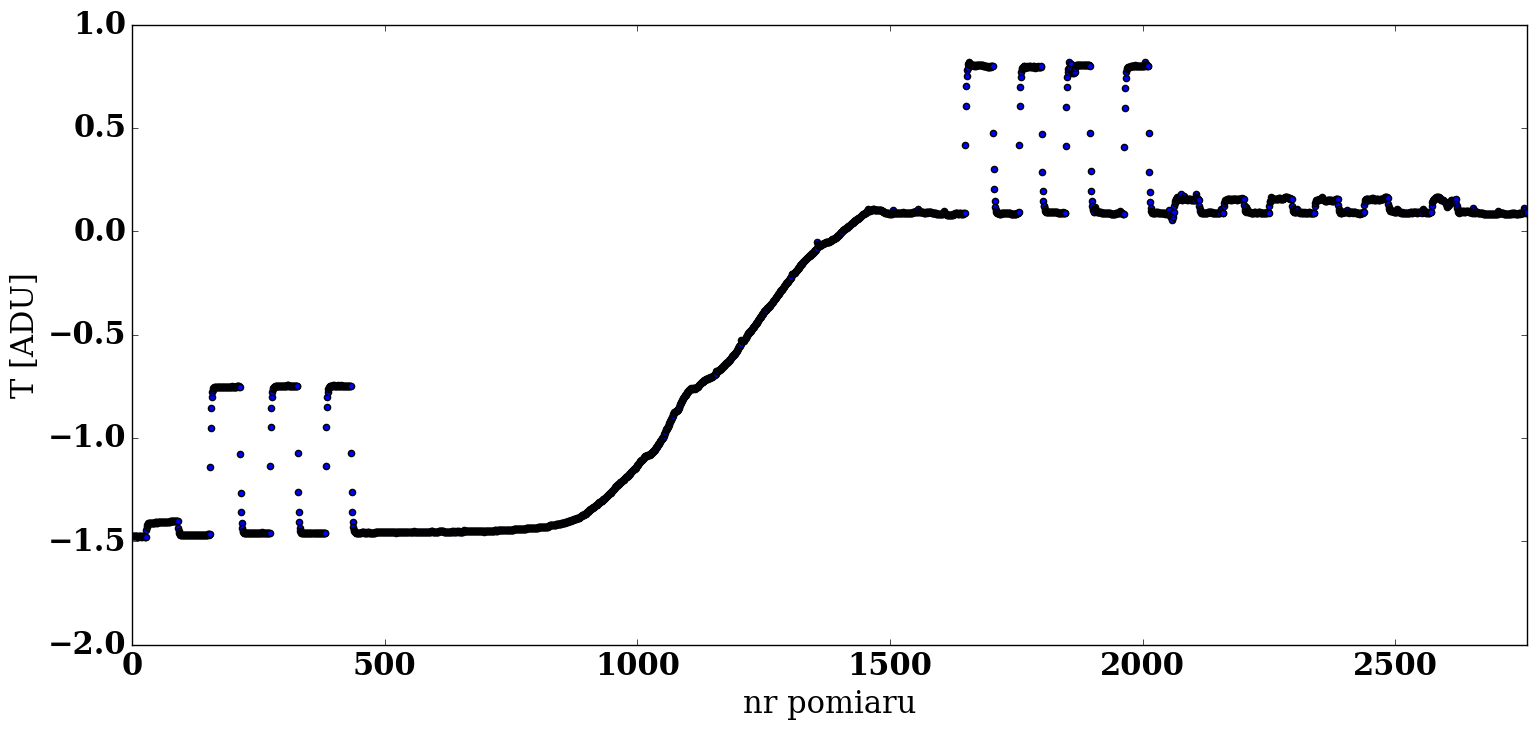

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

def load_data(filename):
    with open(filename) as f:
        res = []
        for line in f:
            res.append(line.split())
        return np.array(res).astype(np.float)
        
data = load_data('/home/dawid/radioastronomy/data/1Bedited.DAT')
print("Liczba punktow pomiarowych: " + str(len(data)))

data_count = len(data)
sig = [float(d[1]) for d in data]
nr = np.arange(data_count)

plt.figure(figsize=(18, 8), dpi= 80)
plt.scatter(nr, sig)
plt.xlim([0,data_count])
plt.xlabel("nr pomiaru")
plt.ylabel("T [ADU]")
plt.show()

Najpierw korzystając z kalibracji wyznaczymy przelicznik z ADU na kelwiny, analogicznie do ćwiczenia 1a.

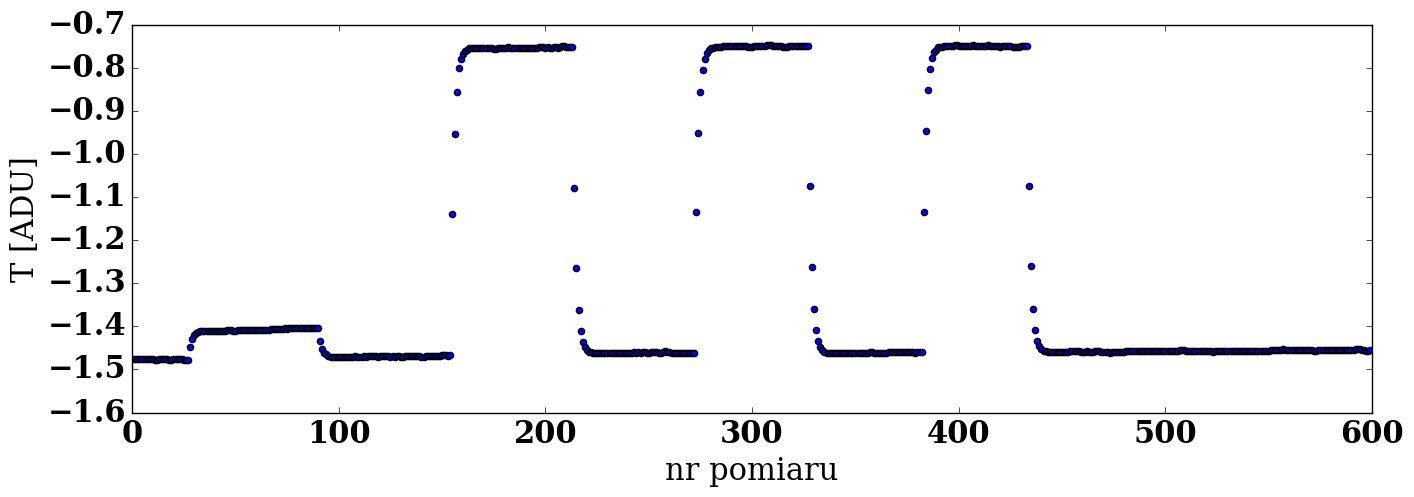

In [2]:
zenith_data = data[:600]
sig = [float(d[1]) for d in zenith_data]
nr = np.arange(len(zenith_data))

plt.figure(figsize=(16, 5))
plt.scatter(nr, sig)
plt.xlim([0, len(zenith_data)])
plt.xlabel("nr pomiaru")
plt.ylabel("T [ADU]")
plt.show()

In [3]:
cal_sig = np.concatenate([sig[170:210], sig[280:320], sig[390:420]])
sys_sig = sig[450:600]

t_cal = np.mean(cal_sig)
dt_cal = np.std(cal_sig)

t_sys = np.mean(sys_sig)
dt_sys = np.std(sys_sig)

print(t_cal, dt_cal, t_sys, dt_sys)

-0.750472727273 0.00247264705752 -1.456284 0.0017686936799


In [4]:
#Wyprowadzenie w cwiczeniu 1a
def a_i(t_cal, t_sys, t_i):
    return t_i * 8670 / (t_cal - t_sys)

def delta_a_i(t_cal, t_sys, dt_cal, dt_sys, t_i):
    return t_i * 8670 * ((dt_sys+dt_cal)/(t_cal - t_sys)/(t_cal - t_sys))

a = a_i(t_cal, t_sys, 0.01)
da = delta_a_i(t_cal, t_sys, dt_cal, dt_sys, 0.01)
print(a, da)

122.837369351 0.738150776047


Otrzymujemy przelicznik $$a = 122.8 \pm 0.8 \frac{K}{ADU}$$
W instrukcji do ćwiczenia powiedziano, żeby przyjąć za temperaturę w horyzoncie $T_{H} = 290K$.

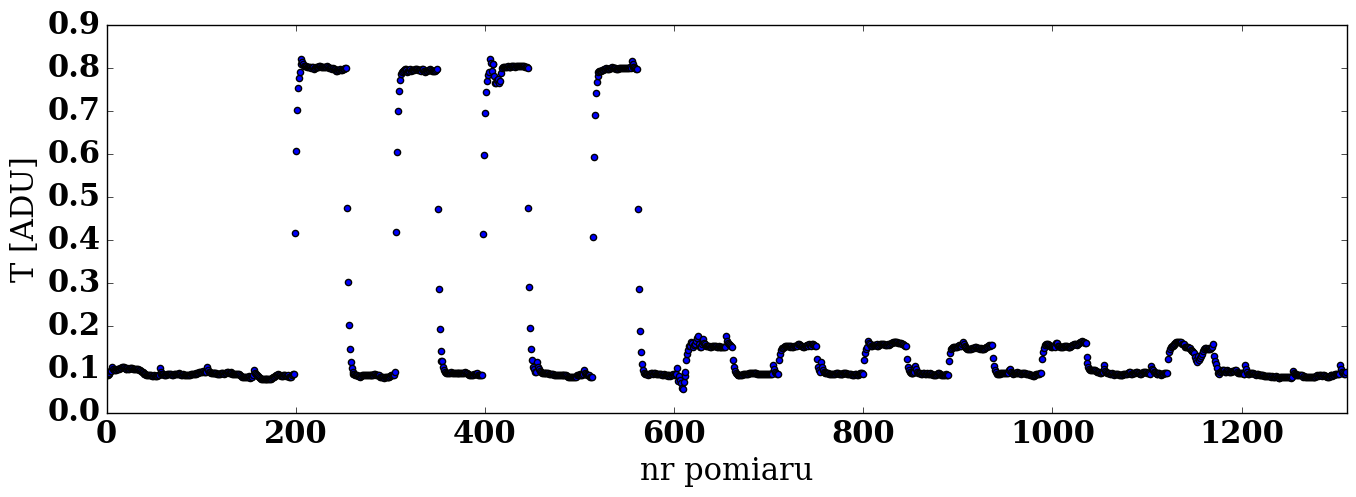

In [5]:
horizon_data = data[1450:]
sig = [d[1] for d in horizon_data]
nr = np.arange(len(horizon_data))

plt.figure(figsize=(16, 5))
plt.scatter(nr, sig)
plt.xlim([0, len(horizon_data)])
#plt.xlim(1100, 1300)
plt.xlabel("nr pomiaru")
plt.ylabel("T [ADU]")
plt.show()

W horyzoncie dane są znacznie bardziej zaszumione niż w zenicie. Ponadto widać piki o prawdopodobnie antropogenicznym pochodzeniu np. z pobliskiego lotniska. Do analizy weżmiemy fragment sprzed pierwszej kalibracji.

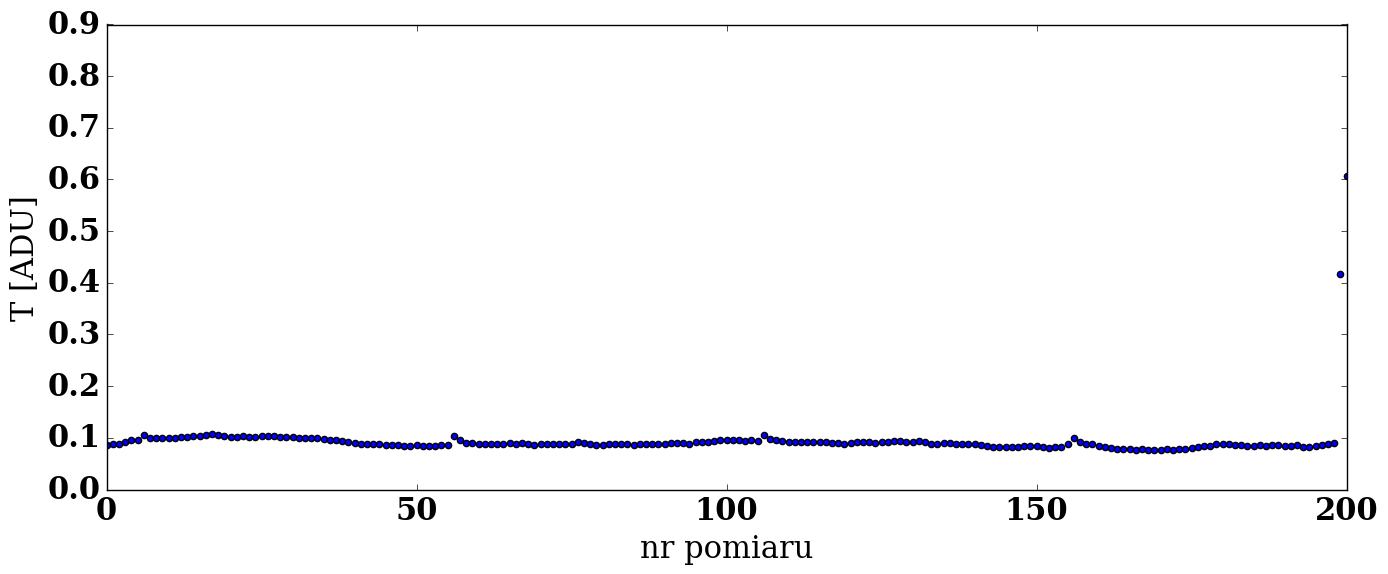

In [6]:
initial_horizon_data = horizon_data[:200]
sig = [d[1] for d in horizon_data]
nr = np.arange(len(horizon_data))

plt.figure(figsize=(16, 6))
plt.scatter(nr, sig)
plt.xlim([0, len(initial_horizon_data)])
plt.xlabel("nr pomiaru")
plt.ylabel("T [ADU]")
plt.show()

Widzimy piki w odstępach dokładnie co 10 sekund. Ponadto na początku wyraźne jest zafalowanie o nieznanym pochodzeniu. Do wyliczenia średniej temperatury w horyzoncie wytniemy pomiary pomiędzy pikami. Podobnie jak w ćwiczeniu 1a wytniemy kilka kawałków samego szumu do oszacowania $T_{sys}$ wybierając fragmenty bez pików i odpowiednio daleko od kalibracji.

W ćwiczeniu 1a wykorzystano dyskretną transformatę Fouriera do sprawdzenia czy obserwowany szum można uznać za szum termiczny. Tym razem sprawdzimy współczynniki korelacji między wyciętymi kawałkami. Jeżeli szum jest podobny do szumu białego to powinny one być bliskie zeru.

In [7]:
horizon_sigs = np.array([sig[65:100], sig[115:150], sig[160:195], sig[465:500], sig[760:795], sig[1060:1095],
                sig[1215:1250], sig[1260:1295]])

from IPython.display import display, HTML

def df_to_html(df, format = "{:.3f}"):
    styles = [
        dict(selector="th", props=[("font-size", "110%"), ("text-align", "center")]),
        dict(selector="td", props=[("text-align", "center")])
    ]
    html = df.style.set_table_styles(styles).format(format).render()
    return html

df1 = pd.DataFrame(np.corrcoef(horizon_sigs))
HTML(df_to_html(df1))

Dla porównania poniżej przykładowa tabela dla białego szumu.

In [8]:
mean = 0
std = 0.001 
num_samples = 35
white_noise_sig = [np.random.normal(mean, std, size=num_samples) for i in range(8)]
df2 = pd.DataFrame(np.corrcoef(white_noise_sig))
HTML(df_to_html(df2))

Różnica pomiędzy powyższymi tabelami jest wyraźna, jednak z powodu braku w tym zadaniu lepszej metody wyznaczymy temperaturę systemową w horyzoncie ze wzoru $$T_{sys} = \Delta T_{sys} \sqrt{B \tau n},$$ gdzie podobnie jak wcześniej $B = 12.6 MHz$, $\tau = 0.2s$, a w tym przypadku $n = 35$. Postępowanie jest identyczne jak w sprawozdaniu z ćw. 1a.

In [9]:
from math import sqrt 
mean_stds = [np.std(sig) for sig in horizon_sigs]
mean_std = np.mean(mean_stds)
std_std = np.std(mean_stds)
t_sys = mean_std * sqrt(12.6e6 * 0.2 * 35) * a
dt_sys = std_std * sqrt(12.6e6 * 0.2 * 35) * a
print(t_sys, dt_sys)

2804.7189995 873.508963661


Otrzymujemy dość dużą wartość (wraz ze sporym błędem względnym) $$T_{sys}^H = 2800 \pm 880 K,$$
co wynika najprawdopodobniej z faktu, że w horyzoncie radioteleskop łapie sygnał z wielu źródeł antropogenicznych. O ile wyraźny codziesięciosekundowy pik jest dość łatwo wyciąć z danych, o tyle zmienność z innych źródeł jest trudna do wyeliminowania. Wyznaczanie temperatury systemowej na podstawie jej wahań w horyzoncie jest raczej mało wiarygodne. 

Trochę wiarygodniejszy wynik może dać pomiar szumów w okolicy zenitu

In [10]:
zsig = [float(d[1]) for d in zenith_data]
zenith_sigs = [zsig[100:140], zsig[227:267], zsig[340:380], zsig[450:490], zsig[490:530]]
mean_stds = [np.std(sig) for sig in zenith_sigs]
mean_std = np.mean(mean_stds)
std_std = np.std(mean_stds)
zt_sys = mean_std * sqrt(12.6e6 * 0.2 * 40) * a
dzt_sys = std_std * sqrt(12.6e6 * 0.2 * 40) * a
print(zt_sys, dzt_sys)

t_zsys_adu = np.mean(sys_sig)
dt_zsys_adu = np.std(sys_sig)

t_hsys_adu = np.mean(np.concatenate(horizon_sigs))
dt_hsys_adu = np.std(np.concatenate(horizon_sigs))

print(t_hsys_adu - t_zsys_adu, dt_zsys_adu + dt_hsys_adu)
t_diff_adu = t_hsys_adu - t_zsys_adu
dt_diff_adu = dt_zsys_adu + dt_hsys_adu
t_diff = t_diff_adu * a
dt_diff = dt_diff_adu * a + t_diff_adu * da
print(t_diff, dt_diff)
              

1228.85703979 108.513559571
1.54319971429 0.00551637432319
189.562593286 1.81673097691


Otrzymujemy $$T_{sys}^Z = 1229 \pm 109 K $$ oraz $$T_{sys}^{H[ADU]} - T_{sys}^{Z[ADU]} = 1.543 \pm 0.006 ADU$$
co po przeliczeniu daje $$T_{sys}^{H} - T_{sys}^{Z} = 190 \pm 2 K$$
czyli $$T_{sys}^H = 1419 \pm 111 K $$

Przy założeniu, że w horyzoncie $T_H = 290 K$ oraz $T_{sys}^H = T_H + T_R$ otrzymujemy temperaturę odbiornika
$$T_R = 1129 \pm 111 K $$.

Celem ćwiczenia jest wyznaczenie współczynników $x$ oraz $G$ we wzorach 
$$W_{H,wyj} = k(T_H + T_R)G+x$$
$$W_{Z,wyj} = k(T_Z + T_R)G+x $$
$$W_{Zcal,wyj} = k(T_Z + T_R + T_{cal})G + x$$

($k$ - stała Boltzmanna $k = 1.38064852(79)×10^{−23} \frac{J}{K} $, $W_{H,wyj}$, $W_{Z,wyj}$, $W_{Zcal,wyj}$ - sygnały wyjściowe mierzone kolejno w horyzoncie, w zenicie i w zenicie z włączonym kalibratorem, w tym przypadku z tłumieniem sprzęgacza $20dB$ co daje $T_{cal} = 86.7K$). Po przekształceniach otrzymujemy układ
$$G = \frac{W_{Zcal} - W_{Z}}{k T_{cal}} $$
$$ $$
$$T_{Z} = T_{H} - \frac{W_{H} - W_{Z}}{W_{Zcal} - W_{Z}} T_{cal}$$
$$ $$
$$x = W_{H} - \frac{W_{Zcal} - W_{Z}}{T_{cal}}(T_{H} + T_{R}) = W_{H} - \frac{W_{Zcal} - W_{Z}}{T_{cal}}T_{sys}^H$$
Metodą różniczki zupełnej otrzymujemy oszacowania błędu:
$$\Delta G  = \frac{\Delta W_{Zcal} + \Delta W_{Z}}{k T_{cal}}$$
$$ $$
$$\Delta T_{Z} = \Delta T_{H} + T_{cal}(\frac{\Delta W_{H}}{|W_{Zcal} - W_{Z}|} + \frac{|W_{H} - W_{Zcal}|}{(W_{Zcal} - W_{Z})^2} \Delta W_{Z} +   \frac{|W_{H} - W_{Z}|}{(W_{Zcal} - W_{Z})^2} \Delta W_{Zcal}  ) $$
$$ $$
$$\Delta x = \Delta W_{H} + \frac{T_{sys}^H}{T_{cal}} (\Delta W_{Zcal} + \Delta W_{Z}) + \frac{|W_{Zcal} - W_{Z}|}{T_{cal}} \Delta T_{sys}^H$$

In [11]:
w_zcal = np.mean(cal_sig)
dw_zcal = np.std(cal_sig)
w_z = t_zsys_adu
dw_z = dt_zsys_adu
w_h = t_hsys_adu
dw_h = dt_hsys_adu
print(w_zcal, dw_zcal, w_z, dw_z, w_h, dw_h)
t_cal = 86.7
k = 1.380649e-23
t_h = 290
dt_h = 0 #w instrukcji nie podano niepewności, dla uproszczenia zakładamy 0 
t_hsys = 1419
dt_hsys = 111

G = (w_zcal - w_z)/(k*t_cal)
t_z = t_h - (w_h - w_z)/(w_zcal - w_z)*t_cal
x = w_h - (w_zcal - w_z)/t_cal*t_hsys

print("G =", G, "\nTz =", t_z, "\nx =", x)

dG = (dw_zcal + dw_z)/(k*t_cal)
dt_z = dt_h + t_cal*(dw_h/(w_zcal-w_z) + dw_z*abs(w_h-w_zcal)/(w_zcal-w_z)**2 + dw_zcal*abs(w_h-w_z)/(w_zcal-w_z)**2)
dx = dw_h + t_hsys/t_cal*(dw_zcal + dw_z) + abs(w_zcal-w_z)/t_cal*dt_hsys

print("dG =", dG, "\ndTz =", dt_z, "\ndx =", dx)


-0.750472727273 0.00247264705752 -1.456284 0.0017686936799 0.0869157142857 0.00374768064329
G = 5.89639012486e+20 
Tz = 100.437406714 
x = -11.4649435245
dG = 3.54324174275e+18 
dTz = 1.38220761926 
dx = 0.976798589284


Otrzymujemy $$G = (590 \pm 4) 10^{18}  \frac{ADU}{J} $$
$$T_{Z} = 100 \pm 2 K$$
$$x = -11.5 \pm 1.0 ADU $$

### Zmiana temperatury nieba w zależności od wysokości nad horyzontem

Przy założeniu, że temperatura odbiornika $T_{R}$ jest stała możemy wyrazić temperaturę nieba jako 
$$T_{A} = \frac{W - x}{kG} - T_{R}$$
Wykres otrzymamy odpowiednio przeliczając deklinację na wysokość. (Aby uzyskać deklinację w stopniach należy przetworzyć plik z radioteleskopu w programie OOD.) Ponadto na wykresie dla prostoty zaniedbamy niepewność pomiaru.

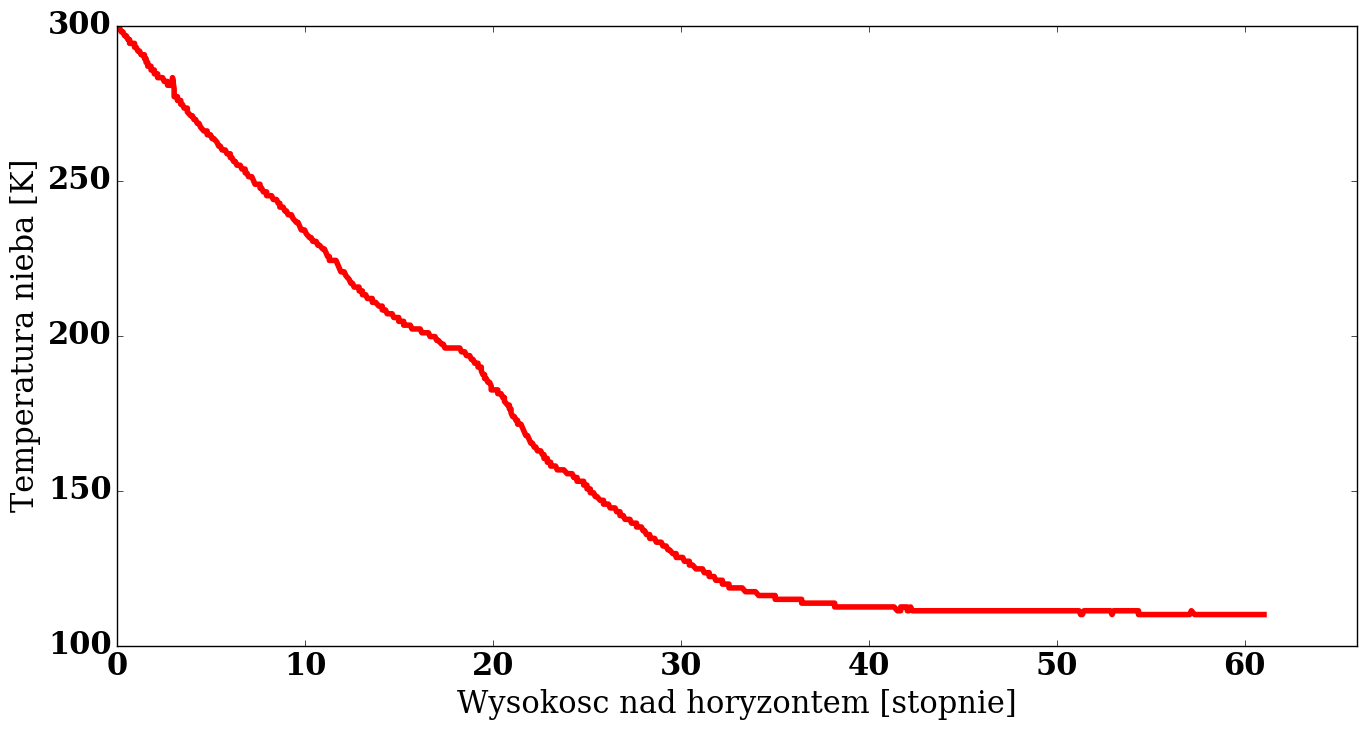

In [12]:
data_after_ood = load_data('/home/dawid/radioastronomy/data/1BTD.DAT')

scan_data = data_after_ood[450:1450]
sigs_adu = [x[2] for x in scan_data]
decs = [x[1] for x in scan_data]
obs_lat = 50.05
hs = []
crossedPole = False
for d in decs:
    if d > 89.95:
        crossedPole = True
    if not crossedPole:
        hs.append(90 - d + obs_lat)
    else:
        hs.append(d - (90 - obs_lat))

def adu_to_k(sig):
    return (sig - x)/(k*G) - 1119
    
sigs = [adu_to_k(s) for s in sigs_adu]

plt.figure(figsize=(16, 8))
plt.plot(hs, sigs, linewidth=4, color='r')
plt.xlim([0, 66])
plt.xlabel("Wysokosc nad horyzontem [stopnie]")
plt.ylabel("Temperatura nieba [K]")
plt.show()

Tak jak można było się spodziewać wraz z oddalaniem się od zenitu sygnał odbierany przez antenę. Im niżej tym więcej sygnału ze źródeł pochodzenia ziemskiego wpada w czaszę radioteleskopu. Ponadto Ziemia jako że ma niezerową temperaturę sama przybliżeniu jak ciało doskonale czarne, co może składać się na część sygnału.

Brakuje wyników dla wysokości większej od 60 stopni, ponieważ w tym zakresie wykonywano kalibrację.